In [1]:
from matplotlib import pyplot as plt
from whar_datasets import (
    get_dataset_cfg,
    WHARDatasetID,
    PostProcessingPipeline,
    PreProcessingPipeline,
    Loader,
    LOSOSplitter,
    KFoldSplitter,
    LGSOSplitter,
)

In [2]:
cfg = get_dataset_cfg(WHARDatasetID.UNIMIB_SHAR)

cfg.parallelize = True
cfg.in_memory = True
force_recompute = False
# force_recompute = [False, False, True, True]

In [3]:
pre_pipeline = PreProcessingPipeline(cfg)
activity_df, session_df, window_df = pre_pipeline.run(force_recompute)

2026-02-20 15:14:30,461 - whar-datasets - INFO - Running DownloadingStep
2026-02-20 15:14:30,462 - whar-datasets - INFO - Checking hash for DownloadingStep
2026-02-20 15:14:30,463 - whar-datasets - INFO - Hash is up to date
2026-02-20 15:14:30,463 - whar-datasets - INFO - Running ExtractingStep
2026-02-20 15:14:30,463 - whar-datasets - INFO - Checking hash for ExtractingStep
2026-02-20 15:14:30,464 - whar-datasets - INFO - Hash is up to date
2026-02-20 15:14:30,464 - whar-datasets - INFO - Running ParsingStep
2026-02-20 15:14:30,464 - whar-datasets - INFO - Checking hash for ParsingStep
2026-02-20 15:14:30,465 - whar-datasets - INFO - Hash is up to date
2026-02-20 15:14:30,465 - whar-datasets - INFO - Running WindowingStep
2026-02-20 15:14:30,466 - whar-datasets - INFO - Checking hash for WindowingStep
2026-02-20 15:14:30,466 - whar-datasets - INFO - Hash is up to date
2026-02-20 15:14:30,466 - whar-datasets - INFO - Loading windowing
2026-02-20 15:14:30,475 - whar-datasets - INFO - ac

In [4]:
splitter = LOSOSplitter(cfg)
# splitter = LGSOSplitter(cfg)
# splitter = KFoldSplitter(cfg)

splits = splitter.get_splits(session_df, window_df)
for split in splits:
    print(
        split.identifier,
        len(split.train_indices),
        len(split.val_indices),
        len(split.test_indices),
    )

subject_0 5124 1281 228
subject_1 5127 1281 225
subject_2 5136 1283 214
subject_3 5100 1274 259
subject_4 5150 1287 196
subject_5 5033 1258 342
subject_6 5064 1266 303
subject_7 5069 1267 297
subject_8 5059 1264 310
subject_9 5095 1273 265
subject_10 5180 1295 158
subject_11 5180 1295 158
subject_12 5163 1290 180
subject_13 5162 1290 181
subject_14 5160 1290 183
subject_15 5192 1297 144
subject_16 5180 1295 158
subject_17 5164 1290 179
subject_18 5148 1286 199
subject_19 5191 1297 145
subject_20 5151 1287 195
subject_21 5192 1298 143
subject_22 5179 1294 160
subject_23 5164 1290 179
subject_24 5085 1271 277
subject_25 5096 1274 263
subject_26 5088 1272 273
subject_27 5101 1275 257
subject_28 5069 1267 297
subject_29 5095 1273 265


In [5]:
post_pipeline = PostProcessingPipeline(
    cfg, pre_pipeline, window_df, splits[0].train_indices
)
samples = post_pipeline.run(False)

2026-02-20 15:14:30,550 - whar-datasets - INFO - Running SamplingStep
2026-02-20 15:14:30,553 - whar-datasets - INFO - Checking hash for SamplingStep
2026-02-20 15:14:30,556 - whar-datasets - INFO - Hash is not up to date
2026-02-20 15:14:31,485 - whar-datasets - INFO - Computing samples
2026-02-20 15:14:31,486 - whar-datasets - INFO - Getting normalization parameters
2026-02-20 15:14:31,589 - whar-datasets - INFO - Normalizing and transforming windows (parallelized)


[########################################] | 100% Completed | 3.77 sms


2026-02-20 15:14:35,611 - whar-datasets - INFO - Saving samples
2026-02-20 15:14:35,647 - whar-datasets - INFO - Loading samples


In [6]:
loader = Loader(session_df, window_df, post_pipeline.samples_dir, samples)
print(len(loader))

6633


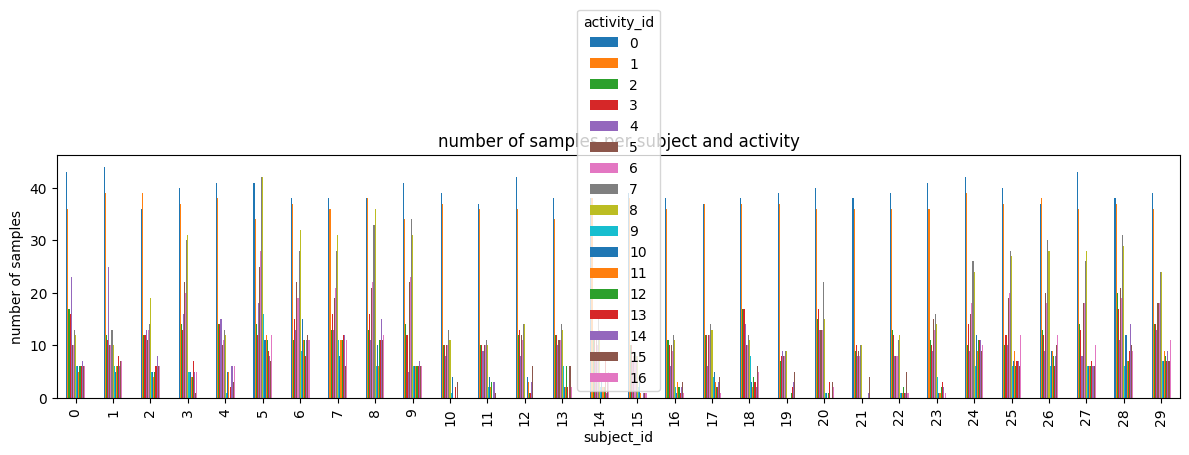

In [7]:
len(loader)
loader.plot_indices_statistics(list(range(len(loader))))

Text(0.5, 1.0, ' Activity: 7, Subject: 1')

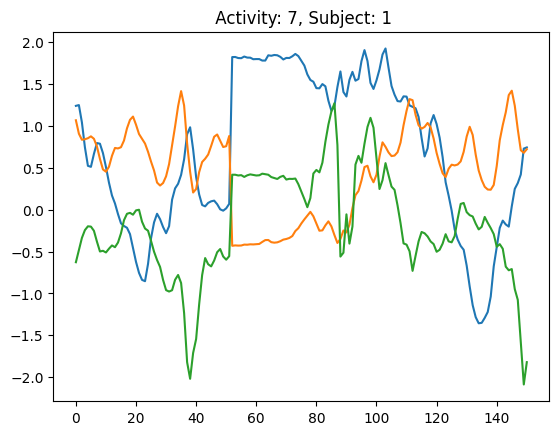

In [38]:
subject_id = None
activity_id = None

# index as ra
ya, ys, (x,) = loader.sample_items(1, activity_id=activity_id, subject_id=subject_id)
ya_single = ya[0]
ys_single = ys[0]
x_single = x[0]

plt.plot(x_single)
plt.title(f" Activity: {ya_single}, Subject: {ys_single}")